Por favor realice el análisis exploratorio de un dataset. 

1. Ideal que sea una parte o versión de un dataset real  o con la complejidad para aplicar difereentes temas vistos en clase, incluya el contexto, pregunta smart, diccionario de datos e hipótesis u objetivo del análisis (1.0 p.t)

2. Realice el análisis exploratorio incluyendo análisis gráfico y estadístico, además de unas conclusiones (2.0)

3. Realice la preparación de los datos y pruebe con un algoritmo básico (2.0)

In [685]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
from scipy.stats import skew, kurtosis  ## funciones estadísticas
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot

CONTEXTO
---------------------------------------------------------

El siguiente dataset contiene información sobre los volumenes de alcohol y gasolina despachados en una destilería de la region del Valle, que por motivos de privacidad no se puede mencionar. El dataset completo contiene mas de 7000 registros, de los cuales se van a eliminar aquellos que corresponden a pruebas y calibraciones y quedan registrados en la tabla.


DICCIONARIO DE DATOS
---------------------------------------------------------

'HORA_INICIO': Hora en que inició el despacho de combustible

'HORA_FIN': Hora en que finalizó el despacho de combustible

'VOLUMEN_P': Volumen total que se programa para el despacho

'COMPARTIMIENTOS': Cantidad de compartimentos que tiene el vehiculo a ser cargado

'BRAZO': Tubería por la cual se suministra el combustible

'TANQUE_ALCOHOL': Tanque desde el cual proviene el combustible para el despacho

'VPC1': volumen programado para el compartimento 1

'VPC2': volumen programado para el compartimento 2

'VPC3': volumen programado para el compartimento 3

'VOLUMEN_D': Volumen NETO despachado

'VDC1': Volumen de alcohol  despachado en el compartimento 1

'VDC2': Volumen de alcohol  despachado en el compartimento 2

'VDC3': Volumen de alcohol  despachado en el compartimento 3

'GASOLINA_D': Volumen de gasolina despachada

'ANHIDRO_D': Volumen NETO de alcohol despachado

'VOL_BRUTO': Volumen bruto despachado


PREGUNTA SMART
---------------------------------------------------------

¿Cuál fue la duración promedio de despacho de alcohol, y su relación con el volumen despachado y el brazo por el cuál se realizó el cargue en los últimos 6 años en la destilería?

Specific: Se quiere saber la relación puntual entre la duración de los despachos, la cantidad despachada y el brazo de despacho.
Measurable: duración promedio que se puede medir en minutos.
Action – oriented: se puede orientar a reducir los tiempos de despacho.
Relevant: La duracíon del despacho tiene alguna relación con el volumen despachado?
Time – bound: Se analizaran datos de los ùltimos 6 años 


OBJETIVO DE ANÁLISIS
---------------------------------------------------------
Evaluar si existe alguna relación entre el tiempo de despacho, el brazo por el cuál se despacha y el volumen despachado, Y si ha habido un cambio en el comportamiento de despachos de alcohol en los últimos 6 años

# Análisis exploratorio

Carga y selección de los elementos que se consideran relevantes para el análisis

In [686]:
df=pd.read_csv('Despachos.csv', delimiter=';')
df = df[['FECHA','HORA_INICIO', 'HORA_FIN', 'VOLUMEN_P','COMPARTIMIENTOS','BRAZO','TANQUE_ALCOHOL','VPC1','VPC2','VPC3','VOLUMEN_D','VDC1','VDC2','VDC3','GASOLINA_D','ANHIDRO_D','VOL_BRUTO']]
df

,FECHA,HORA_INICIO,HORA_FIN,VOLUMEN_P,COMPARTIMIENTOS,BRAZO,TANQUE_ALCOHOL,VPC1,VPC2,VPC3,VOLUMEN_D,VDC1,VDC2,VDC3,GASOLINA_D,ANHIDRO_D,VOL_BRUTO
0,2016-12-30,18:08:24,18:49:21,11200,2,3.0,2.0,5600,5600,0,"11078,085319519","5539,16204833984","5538,9232711792",NaN,"255,974967956543","10822,1103515625","11199,6036682129"
1,2017-01-02,15:25:44,16:11:42,11200,2,2.0,2.0,5300,5900,0,"11067,1074752808","5232,38452911377","5834,72294616699",NaN,"255,539604187012","10811,5678710938","11200,927192688"
2,2017-01-02,16:52:38,17:24:59,9800,1,1.0,2.0,9800,0,0,"9691,8946685791","9691,8946685791",NaN,NaN,"223,684707641602","9468,2099609375","9803,51029968262"
3,2017-01-02,17:51:07,18:26:55,11200,2,2.0,2.0,5600,5600,0,"11079,7851333618","5539,06548309326","5540,71965026855",NaN,"255,582008361817","10824,203125","11201,130645752"
4,2017-01-02,19:01:46,19:37:02,11000,1,1.0,2.0,11000,0,0,"10881,7992858887","10881,7992858887",NaN,NaN,"251,142059326172","10630,6572265625","10999,3591156006"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,2023-05-13,10:26:20,10:53:37,10900,1,1.0,1.0,10900,0,0,"10757,583","10757,583",NaN,NaN,"216,783","10540,8","10894,911"
7776,2023-05-13,11:09:53,11:55:09,10600,3,1.0,1.0,4000,3300,3300,"10449,7203","3942,7475","3253,2866","3253,6862","211,3303","10238,39","10582,74"
7777,2023-05-13,12:32:33,12:58:57,11000,1,1.0,1.0,11000,0,0,"10853,425","10853,425",NaN,NaN,"218,725","10634,7","10992,566"
7778,2023-05-13,14:44:00,15:08:34,11000,1,1.0,1.0,11000,0,0,"10855,016","10855,016",NaN,NaN,"218,716","10636,3","10992,858"


Observamos cuantos valores nulos tiene cada columna

In [687]:
df.isna().sum()

FECHA                 0
HORA_INICIO           0
HORA_FIN            141
VOLUMEN_P             0
COMPARTIMIENTOS       0
BRAZO                36
TANQUE_ALCOHOL       36
VPC1                  0
VPC2                  0
VPC3                  0
VOLUMEN_D            40
VDC1                 55
VDC2               5613
VDC3               7406
GASOLINA_D           40
ANHIDRO_D            40
VOL_BRUTO            40
dtype: int64

Observamos de qué tipo son los datos de cada columna

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            7780 non-null   object 
 1   HORA_INICIO      7780 non-null   object 
 2   HORA_FIN         7639 non-null   object 
 3   VOLUMEN_P        7780 non-null   object 
 4   COMPARTIMIENTOS  7780 non-null   int64  
 5   BRAZO            7744 non-null   float64
 6   TANQUE_ALCOHOL   7744 non-null   float64
 7   VPC1             7780 non-null   int64  
 8   VPC2             7780 non-null   int64  
 9   VPC3             7780 non-null   int64  
 10  VOLUMEN_D        7740 non-null   object 
 11  VDC1             7725 non-null   object 
 12  VDC2             2167 non-null   object 
 13  VDC3             374 non-null    object 
 14  GASOLINA_D       7740 non-null   object 
 15  ANHIDRO_D        7740 non-null   object 
 16  VOL_BRUTO        7740 non-null   object 
dtypes: float64(2),

Corregimos el formato de los datos 

In [689]:
df['VOLUMEN_P'] = df['VOLUMEN_P'].str.replace(',', '.')
df['VOLUMEN_P'] = pd.to_numeric(df['VOLUMEN_P'], errors='coerce', downcast='float')
df['VOLUMEN_D'] = df['VOLUMEN_D'].str.replace(',', '.')
df['VOLUMEN_D'] = pd.to_numeric(df['VOLUMEN_D'], errors='coerce', downcast='float')
df['VDC1'] = df['VDC1'].str.replace(',', '.')
df['VDC1'] = pd.to_numeric(df['VDC1'], errors='coerce', downcast='float')
df['VDC2'] = df['VDC2'].str.replace(',', '.')
df['VDC2'] = pd.to_numeric(df['VDC2'], errors='coerce', downcast='float')
df['VDC3'] = df['VDC3'].str.replace(',', '.')
df['VDC3'] = pd.to_numeric(df['VDC3'], errors='coerce', downcast='float')
df['GASOLINA_D'] = df['GASOLINA_D'].str.replace(',', '.')
df['GASOLINA_D'] = pd.to_numeric(df['GASOLINA_D'], errors='coerce', downcast='float')
df['ANHIDRO_D'] = df['ANHIDRO_D'].str.replace(',', '.')
df['ANHIDRO_D'] = pd.to_numeric(df['ANHIDRO_D'], errors='coerce', downcast='float')
df['VOL_BRUTO'] = df['VOL_BRUTO'].str.replace(',', '.')
df['VOL_BRUTO'] = pd.to_numeric(df['VOL_BRUTO'], errors='coerce', downcast='float')
#Las columnas compartimentos y tanques de alcohol, funcionan mas como variables categoricas y no numéricas, por eso convertimos
df['COMPARTIMIENTOS'] = df['COMPARTIMIENTOS'].astype('object')
df['BRAZO'] = df['BRAZO'].astype('object')
df['TANQUE_ALCOHOL'] = df['TANQUE_ALCOHOL'].astype('object')

Revisamos rapidamente los elementos de tipo cuantitativo del dataset

In [690]:
df.describe()

,VOLUMEN_P,VPC1,VPC2,VPC3,VOLUMEN_D,VDC1,VDC2,VDC3,GASOLINA_D,ANHIDRO_D,VOL_BRUTO
count,7780.000000,7780.000000,7780.000000,7780.000000,7.740000e+03,7.725000e+03,2.167000e+03,3.740000e+02,7.740000e+03,7.740000e+03,7.740000e+03
mean,10833.457031,9230.443573,1435.256684,127.763625,3.527462e+10,9.375188e+09,2.318675e+10,7.981367e+10,5.782526e+08,3.469637e+10,3.571947e+10
std,1781.771729,2972.842504,2430.587983,619.705961,1.049196e+12,2.601190e+11,4.063782e+11,7.686549e+11,3.157218e+10,1.038660e+12,1.062083e+12
min,20.000000,0.000000,0.000000,0.000000,-3.467475e-01,1.425272e-03,8.235033e+00,6.036503e-01,-5.558219e+01,-3.467475e-01,-3.510001e-01
25%,11000.000000,6300.000000,0.000000,0.000000,1.085521e+04,6.229319e+03,5.341692e+03,7.495313e+02,2.185446e+02,1.062568e+04,1.099344e+04
50%,11200.000000,11000.000000,0.000000,0.000000,1.106151e+04,1.085639e+04,5.546566e+03,3.358009e+03,2.236987e+02,1.081458e+04,1.119699e+04
75%,11300.000000,11200.000000,3400.000000,0.000000,1.122476e+04,1.107859e+04,5.931181e+03,3.465604e+03,2.507290e+02,1.099578e+04,1.135386e+04
max,12500.000000,12300.000000,7500.000000,4250.000000,3.747323e+13,7.524720e+12,7.487361e+12,7.490400e+12,2.497991e+12,3.747323e+13,3.790959e+13


Revisamos que la corrección del formato haya quedado correctamente

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            7780 non-null   object 
 1   HORA_INICIO      7780 non-null   object 
 2   HORA_FIN         7639 non-null   object 
 3   VOLUMEN_P        7780 non-null   float32
 4   COMPARTIMIENTOS  7780 non-null   object 
 5   BRAZO            7744 non-null   object 
 6   TANQUE_ALCOHOL   7744 non-null   object 
 7   VPC1             7780 non-null   int64  
 8   VPC2             7780 non-null   int64  
 9   VPC3             7780 non-null   int64  
 10  VOLUMEN_D        7740 non-null   float64
 11  VDC1             7725 non-null   float64
 12  VDC2             2167 non-null   float64
 13  VDC3             374 non-null    float64
 14  GASOLINA_D       7740 non-null   float64
 15  ANHIDRO_D        7740 non-null   float64
 16  VOL_BRUTO        7740 non-null   float64
dtypes: float32(1),

## Análisis de variables categóricas

In [692]:
tabla_freq_Compartimento=(pd.crosstab(index=df["COMPARTIMIENTOS"],columns="count")).reset_index()
tabla_freq_Compartimento['Freq. Rel.']=tabla_freq_Compartimento['count']/sum(tabla_freq_Compartimento['count'])
tabla_freq_Compartimento.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq_Compartimento=tabla_freq_Compartimento.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq_Compartimento

col_0,COMPARTIMIENTOS,Freq. Abs.,Freq. Rel.
0,1,5554,0.713882
1,2,1777,0.228406
2,3,269,0.034576
3,5,152,0.019537
4,4,24,0.003085
5,0,4,0.000514


Como una de las condiciones del despacho es que no es posible llenar 5 compartimentos sin que se llene un 4 compartimento, se proceden a eliminar estos valores que para nuestro caso de análisis son errados.

In [693]:
df = df.loc[df['COMPARTIMIENTOS'] <= 3]
df = df.loc[df['COMPARTIMIENTOS'] >= 1]

In [694]:
tabla_freq_Compartimento=(pd.crosstab(index=df["COMPARTIMIENTOS"],columns="count")).reset_index()
tabla_freq_Compartimento['Freq. Rel.']=tabla_freq_Compartimento['count']/sum(tabla_freq_Compartimento['count'])
tabla_freq_Compartimento.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq_Compartimento=tabla_freq_Compartimento.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq_Compartimento

col_0,COMPARTIMIENTOS,Freq. Abs.,Freq. Rel.
0,1,5554,0.730789
1,2,1777,0.233816
2,3,269,0.035395


In [695]:
tabla_freq_Tanque=(pd.crosstab(index=df["TANQUE_ALCOHOL"],columns="count")).reset_index()
tabla_freq_Tanque['Freq. Rel.']=tabla_freq_Tanque['count']/sum(tabla_freq_Tanque['count'])
tabla_freq_Tanque.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq_Tanque=tabla_freq_Tanque.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq_Tanque

col_0,TANQUE_ALCOHOL,Freq. Abs.,Freq. Rel.
0,2.0,5783,0.763231
1,1.0,1791,0.236373
2,0.0,3,0.000396


Se eliminan los elementos que corresponden a un tanque "0"

In [696]:
df = df.loc[df['TANQUE_ALCOHOL'] >= 1]

In [697]:
tabla_freq_Tanque=(pd.crosstab(index=df["TANQUE_ALCOHOL"],columns="count")).reset_index()
tabla_freq_Tanque['Freq. Rel.']=tabla_freq_Tanque['count']/sum(tabla_freq_Tanque['count'])
tabla_freq_Tanque.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq_Tanque=tabla_freq_Tanque.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq_Tanque

col_0,TANQUE_ALCOHOL,Freq. Abs.,Freq. Rel.
0,2.0,5783,0.763533
1,1.0,1791,0.236467


In [698]:
tabla_freq_Brazo=(pd.crosstab(index=df["BRAZO"],columns="count")).reset_index()
tabla_freq_Brazo['Freq. Rel.']=tabla_freq_Brazo['count']/sum(tabla_freq_Brazo['count'])
tabla_freq_Brazo.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq_Brazo=tabla_freq_Brazo.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq_Brazo

col_0,BRAZO,Freq. Abs.,Freq. Rel.
0,1.0,5262,0.694745
1,3.0,1603,0.211645
2,2.0,709,0.093610


## Análisis de variables Continuas y eliminación de Outliers

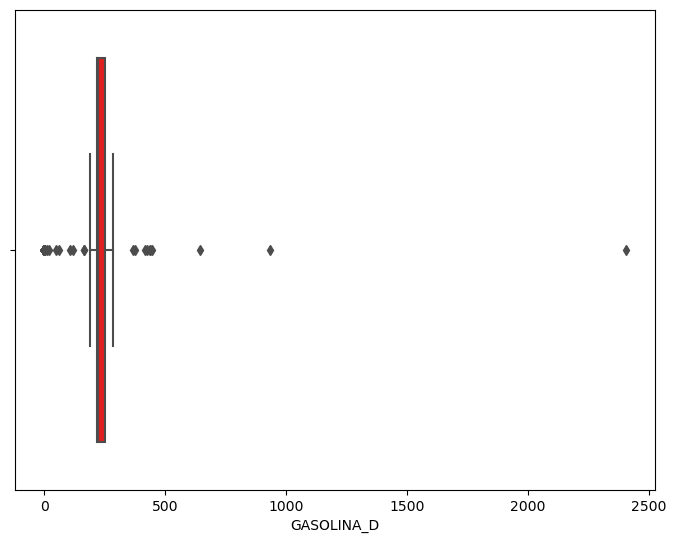

In [699]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['GASOLINA_D'],color="Red")
plt.show() 

Eliminamos los Outliers de gasolina con valores menores a 180 ya que por debajo de este valor se hacen pruebas de calibración y por encima de 300 son derrames o errores en el despacho.

In [700]:
df = df.loc[df['GASOLINA_D'] <= 300]
df = df.loc[df['GASOLINA_D'] >= 180]

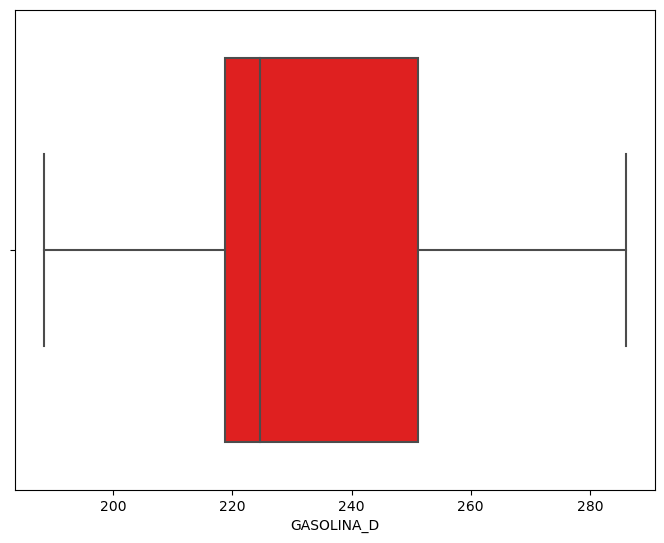

In [701]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['GASOLINA_D'],color="Red")
plt.show() 

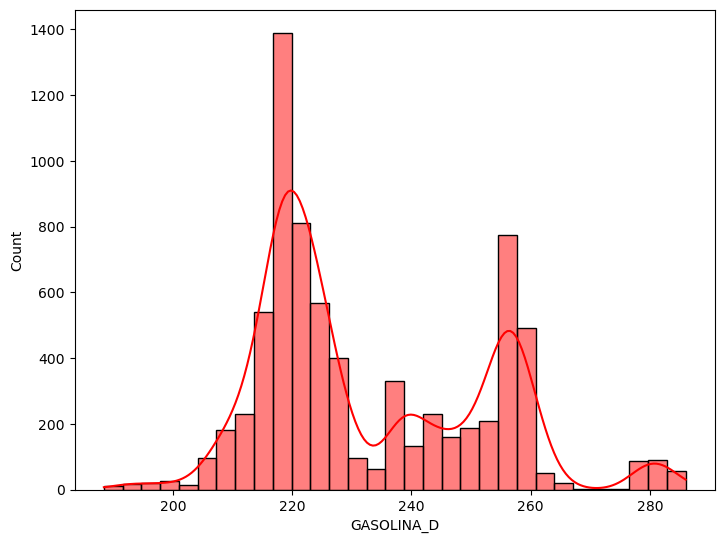

In [702]:
fig_hist_Mat = plt.figure() 
ax = fig_hist_Mat.add_axes([0,0,1,1])
ax=sns.histplot(x=df['GASOLINA_D'],kde=True,color="Red", 
                bins=round(1+3.322*np.log(len(df['GASOLINA_D']))))
plt.show() 

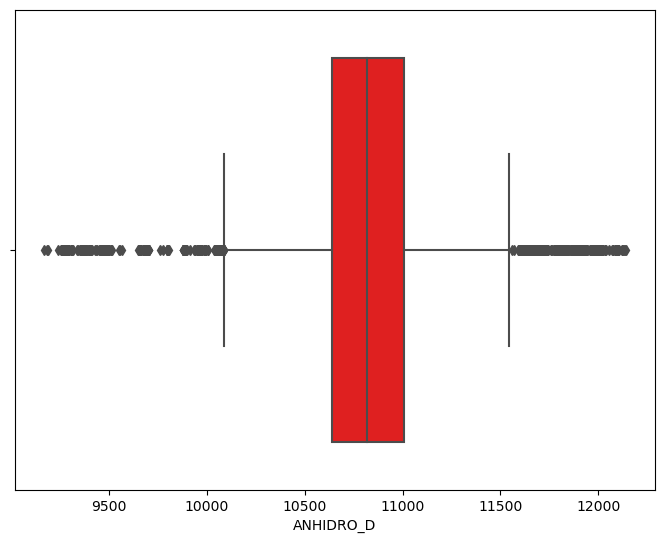

In [703]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['ANHIDRO_D'],color="Red")
plt.show() 

Valores de alcohol Anhidro por debajo de 7000 y mayores a 12000 se consideran outliers ya que no se drealizan despachos por debajo de este valor y tampoco hay carrotanques que superen los 12000 Galones para despacho

In [704]:
df = df.loc[df['ANHIDRO_D'] <= 12000]
df = df.loc[df['ANHIDRO_D'] >= 7000]

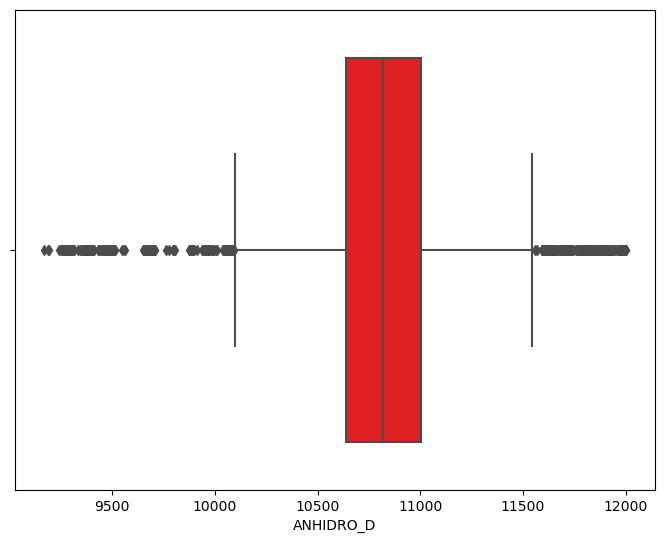

In [705]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['ANHIDRO_D'],color="Red")
plt.show() 

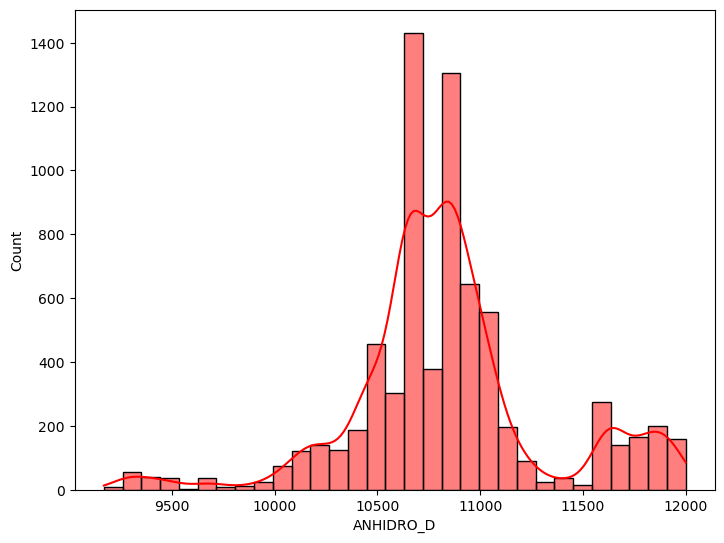

In [706]:
fig_hist_Mat = plt.figure() 
ax = fig_hist_Mat.add_axes([0,0,1,1])
ax=sns.histplot(x=df['ANHIDRO_D'],kde=True,color="Red", 
                bins=round(1+3.322*np.log(len(df['ANHIDRO_D']))))
plt.show() 

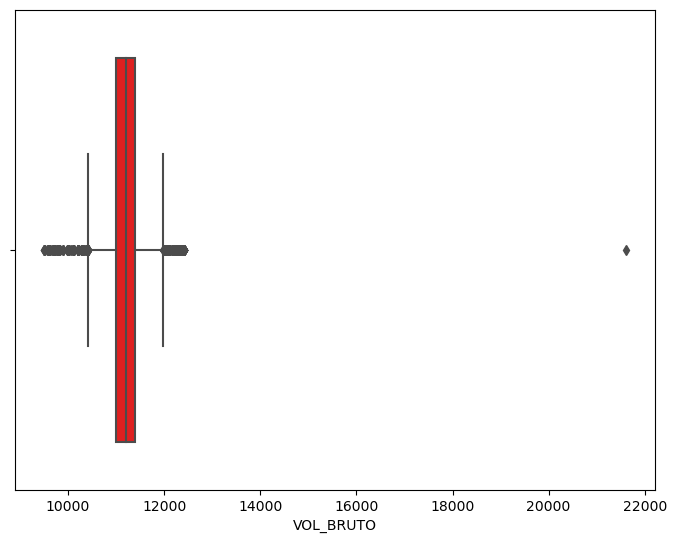

In [707]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['VOL_BRUTO'],color="Red")
plt.show() 

In [708]:
df = df.loc[df['VOL_BRUTO'] >= 7000]
df = df.loc[df['VOL_BRUTO'] <= 12000]

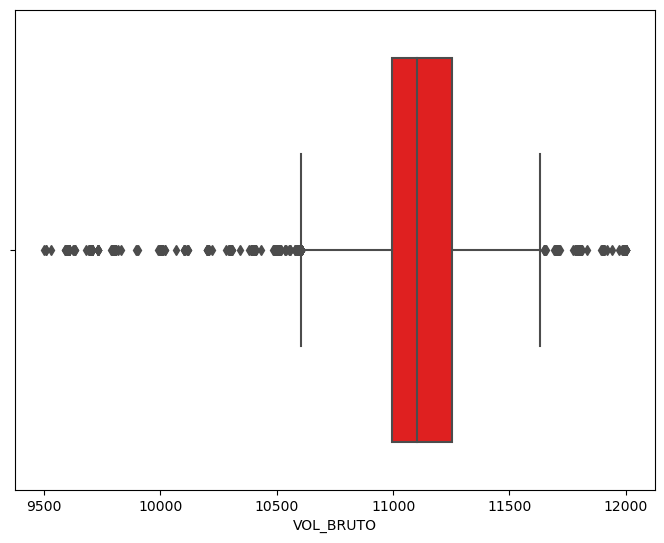

In [709]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['VOL_BRUTO'],color="Red")
plt.show() 

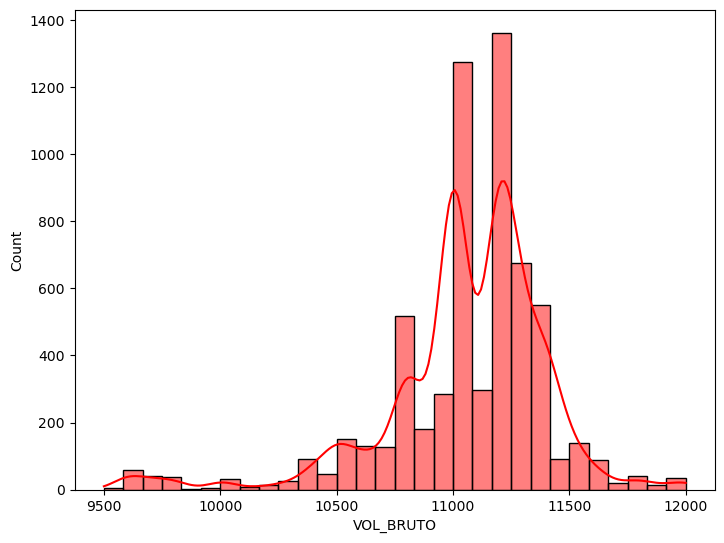

In [710]:
fig_hist_Mat = plt.figure() 
ax = fig_hist_Mat.add_axes([0,0,1,1])
ax=sns.histplot(x=df['VOL_BRUTO'],kde=True,color="Red", 
                bins=round(1+3.322*np.log(len(df['VOL_BRUTO']))))
plt.show() 

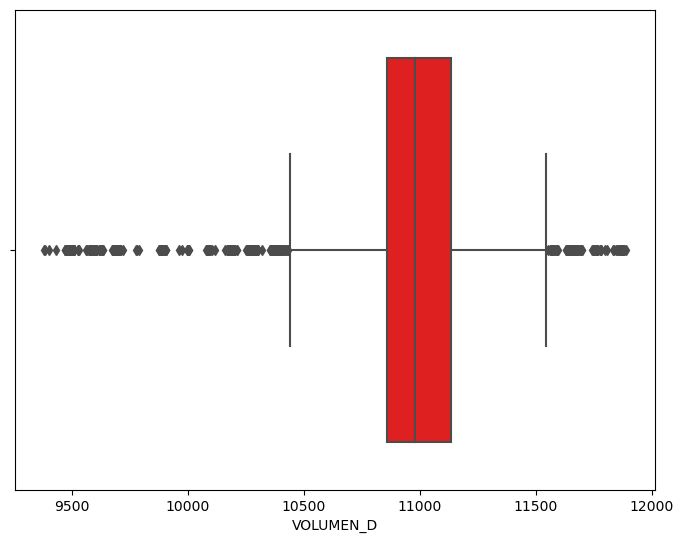

In [711]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['VOLUMEN_D'],color="Red")
plt.show() 

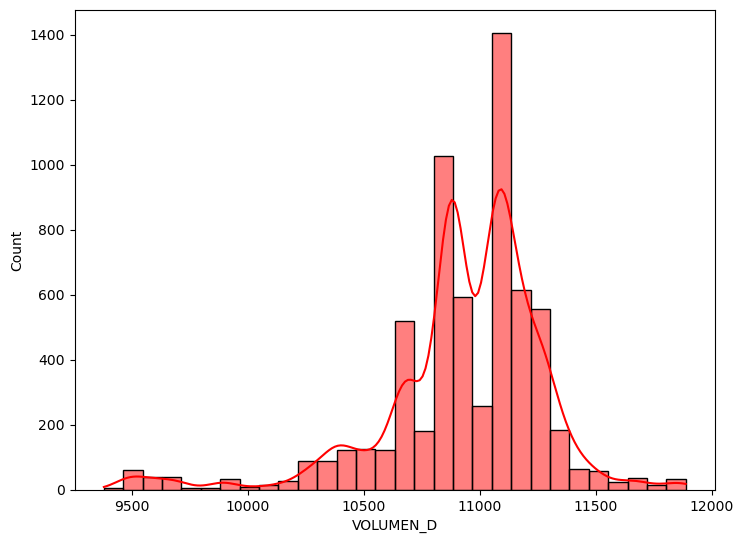

In [712]:
fig_hist_Mat = plt.figure() 
ax = fig_hist_Mat.add_axes([0,0,1,1])
ax=sns.histplot(x=df['VOLUMEN_D'],kde=True,color="Red", 
                bins=round(1+3.322*np.log(len(df['VOLUMEN_D']))))
plt.show() 

# Feature Engineering

En este paso vamos a añadir la variable de año y mes al dataset con base en la columna FECHA, ya que nos es mas útil de esta manera

In [713]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df.drop(['FECHA'], axis=1, inplace=True)

También convertimos la hora de inicio y la hora de fin en un dato de tiempo de despacho que nos brinda mayor información que los otros 2 datos.

In [714]:
df['HORA_INICIO'] = pd.to_datetime(df['HORA_INICIO'])
df['HORA_FIN'] = pd.to_datetime(df['HORA_FIN'])
df['Tiempo_despacho'] = (df['HORA_FIN'] - df['HORA_INICIO']).dt.total_seconds() / 60
df.drop(['HORA_INICIO', 'HORA_FIN'], axis=1, inplace=True)
df

,VOLUMEN_P,COMPARTIMIENTOS,BRAZO,TANQUE_ALCOHOL,VPC1,VPC2,VPC3,VOLUMEN_D,VDC1,VDC2,VDC3,GASOLINA_D,ANHIDRO_D,VOL_BRUTO,AÑO,MES,Tiempo_despacho
0,11200.0,2,3.0,2.0,5600,5600,0,11078.085320,5539.162048,5538.923271,NaN,255.974968,10822.110352,11199.603668,2016,12,40.950000
1,11200.0,2,2.0,2.0,5300,5900,0,11067.107475,5232.384529,5834.722946,NaN,255.539604,10811.567871,11200.927193,2017,1,45.966667
2,9800.0,1,1.0,2.0,9800,0,0,9691.894669,9691.894669,NaN,NaN,223.684708,9468.209961,9803.510300,2017,1,32.350000
3,11200.0,2,2.0,2.0,5600,5600,0,11079.785133,5539.065483,5540.719650,NaN,255.582008,10824.203125,11201.130646,2017,1,35.800000
4,11000.0,1,1.0,2.0,11000,0,0,10881.799286,10881.799286,NaN,NaN,251.142059,10630.657227,10999.359116,2017,1,35.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,10900.0,1,1.0,1.0,10900,0,0,10757.583000,10757.583000,NaN,NaN,216.783000,10540.800000,10894.911000,2023,5,27.283333
7776,10600.0,3,1.0,1.0,4000,3300,3300,10449.720300,3942.747500,3253.286600,3253.6862,211.330300,10238.390000,10582.740000,2023,5,45.266667
7777,11000.0,1,1.0,1.0,11000,0,0,10853.425000,10853.425000,NaN,NaN,218.725000,10634.700000,10992.566000,2023,5,26.400000
7778,11000.0,1,1.0,1.0,11000,0,0,10855.016000,10855.016000,NaN,NaN,218.716000,10636.300000,10992.858000,2023,5,24.566667


Eliminamos tambien outliers de este tiempo, ya que tiempos por debajo de 28 minutos pueden considerarse tiempos de caalibración o pruebas de mantenimiento, de igual manera un despacho de mas de 45 minutos significa que hubo una falla en el sistema de despacho.

In [715]:
df = df.loc[df['Tiempo_despacho'] >= 28]
df = df.loc[df['Tiempo_despacho'] <= 45]

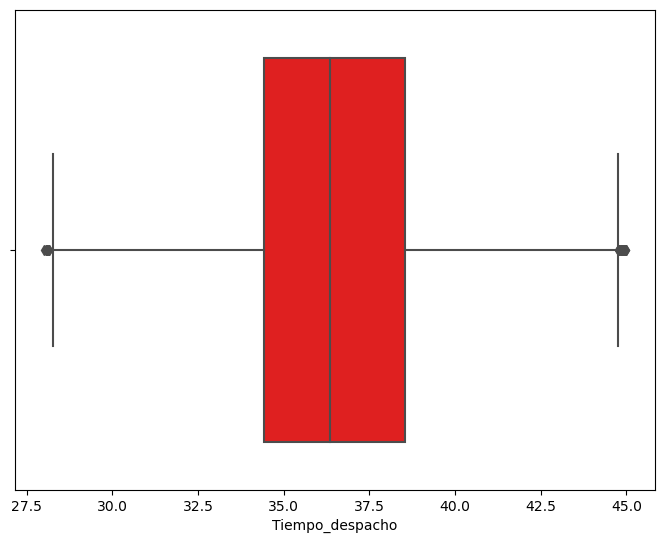

In [716]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax = sns.boxplot(x=df['Tiempo_despacho'],color="Red")
plt.show() 

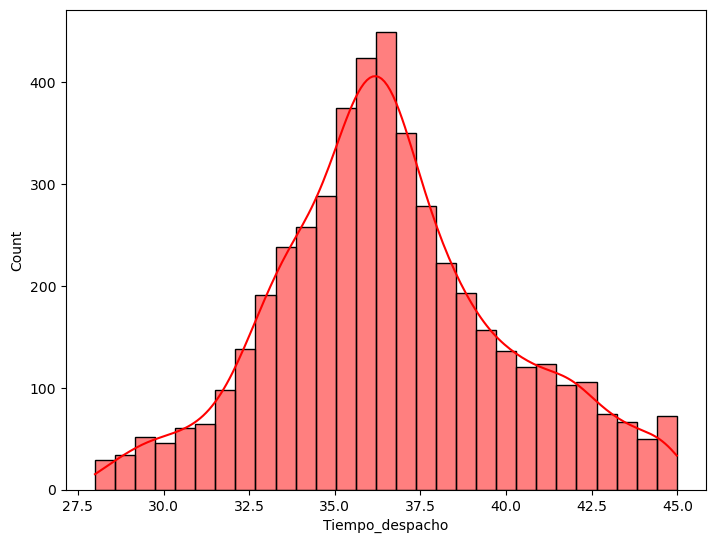

In [717]:
fig_hist_Mat = plt.figure() 
ax = fig_hist_Mat.add_axes([0,0,1,1])
ax=sns.histplot(x=df['Tiempo_despacho'],kde=True,color="Red", 
                bins=round(1+3.322*np.log(len(df['Tiempo_despacho']))))
plt.show() 

In [718]:
df.shape

(4796, 17)

Al final, nos quedamos con un dataset de 4796 datos y 17 columnas.

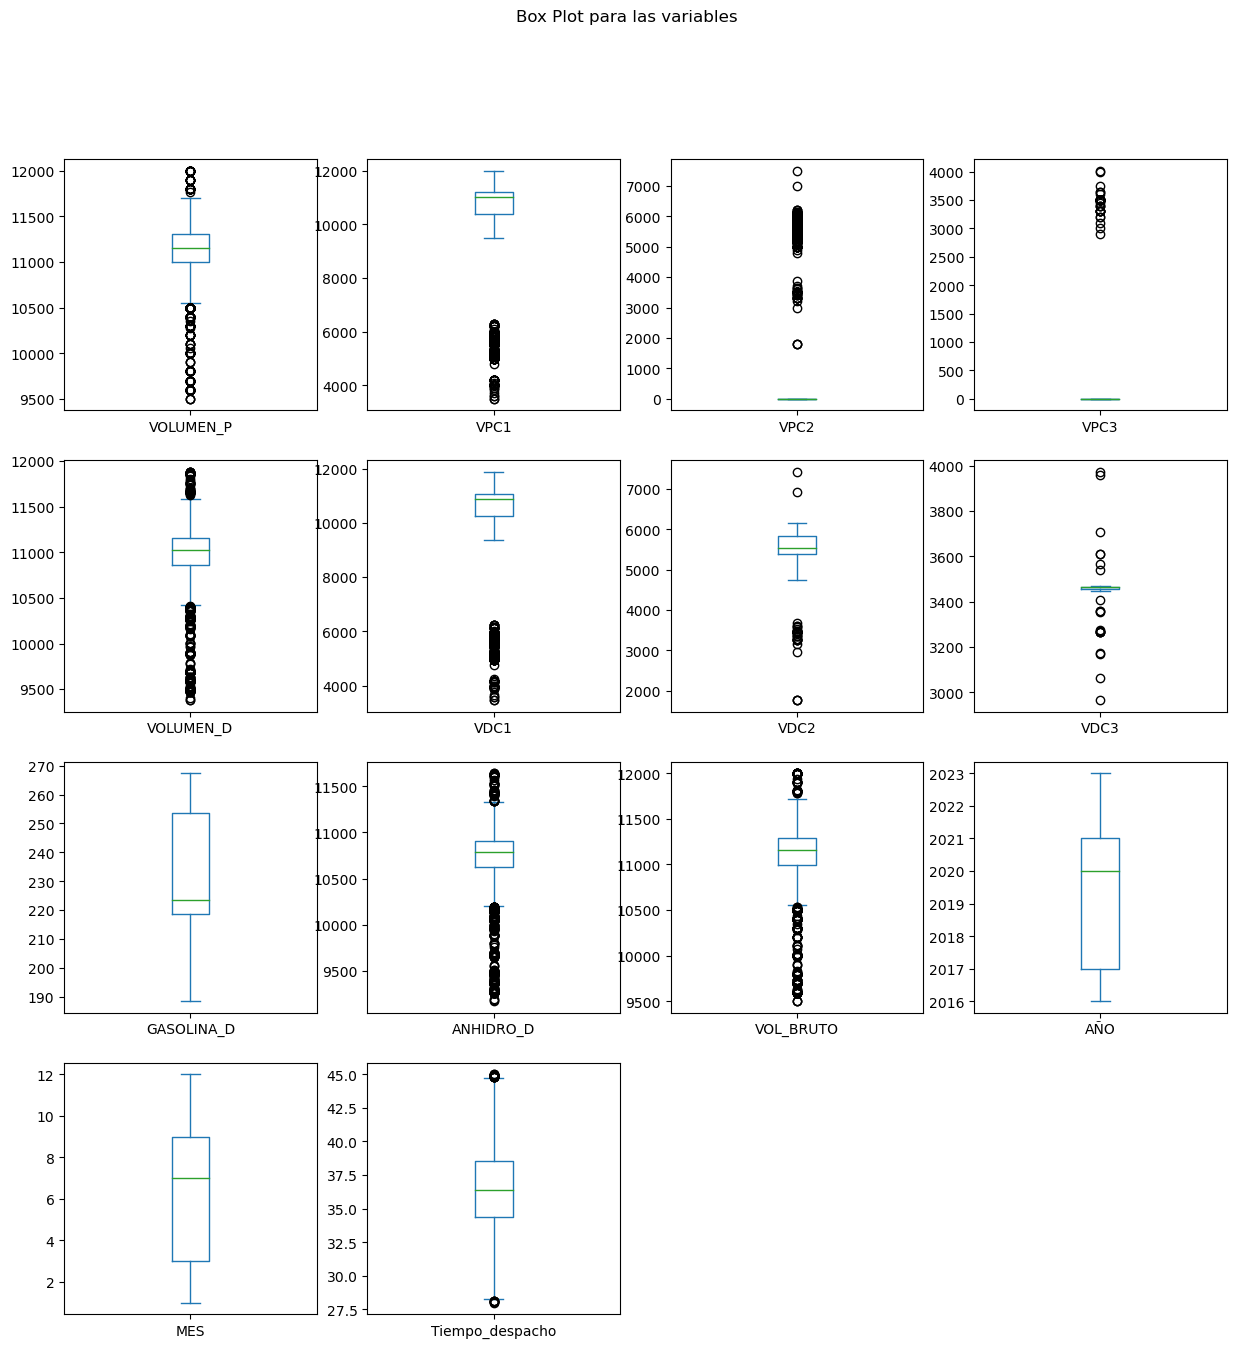

In [719]:
df.drop('COMPARTIMIENTOS', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables')
plt.show()

In [722]:
df.describe()

,VOLUMEN_P,VPC1,VPC2,VPC3,VOLUMEN_D,VDC1,VDC2,VDC3,GASOLINA_D,ANHIDRO_D,VOL_BRUTO,AÑO,MES,Tiempo_despacho
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,1003.000000,77.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000
mean,11055.547852,9850.219766,1148.816722,56.511885,10933.447902,9742.267816,5431.261594,3446.030093,231.605423,10701.842479,11058.528123,2019.409716,6.248957,36.579222
std,364.129364,2311.969984,2253.474758,439.984796,360.749024,2284.029661,655.987213,137.787028,18.042020,352.039291,364.255442,1.839771,3.532620,3.372302
min,9500.000000,3500.000000,0.000000,0.000000,9379.672211,3462.317162,1770.440720,2965.458405,188.416351,9168.775391,9499.135834,2016.000000,1.000000,28.000000
25%,11000.000000,10400.000000,0.000000,0.000000,10857.856339,10259.136543,5388.960804,3457.098274,218.662041,10626.126465,10994.650889,2017.000000,3.000000,34.412500
50%,11150.000000,11000.000000,0.000000,0.000000,11026.384136,10872.010676,5539.873871,3463.257240,223.502884,10789.756348,11153.590500,2020.000000,7.000000,36.350000
75%,11300.000000,11200.000000,0.000000,0.000000,11151.556229,11082.269997,5834.988297,3465.826736,253.727835,10908.874268,11292.522346,2021.000000,9.000000,38.550000
max,12000.000000,12000.000000,7500.000000,4020.000000,11881.150528,11881.150528,7417.066116,3973.102951,267.391022,11642.307617,11999.890656,2023.000000,12.000000,44.983333


El tiempo promedio de duración de despacho de alcohol es de 36.579222 minutos y el promedio de volumenes despachados es de 11058.528123 Galones

# Relaciones entre variables

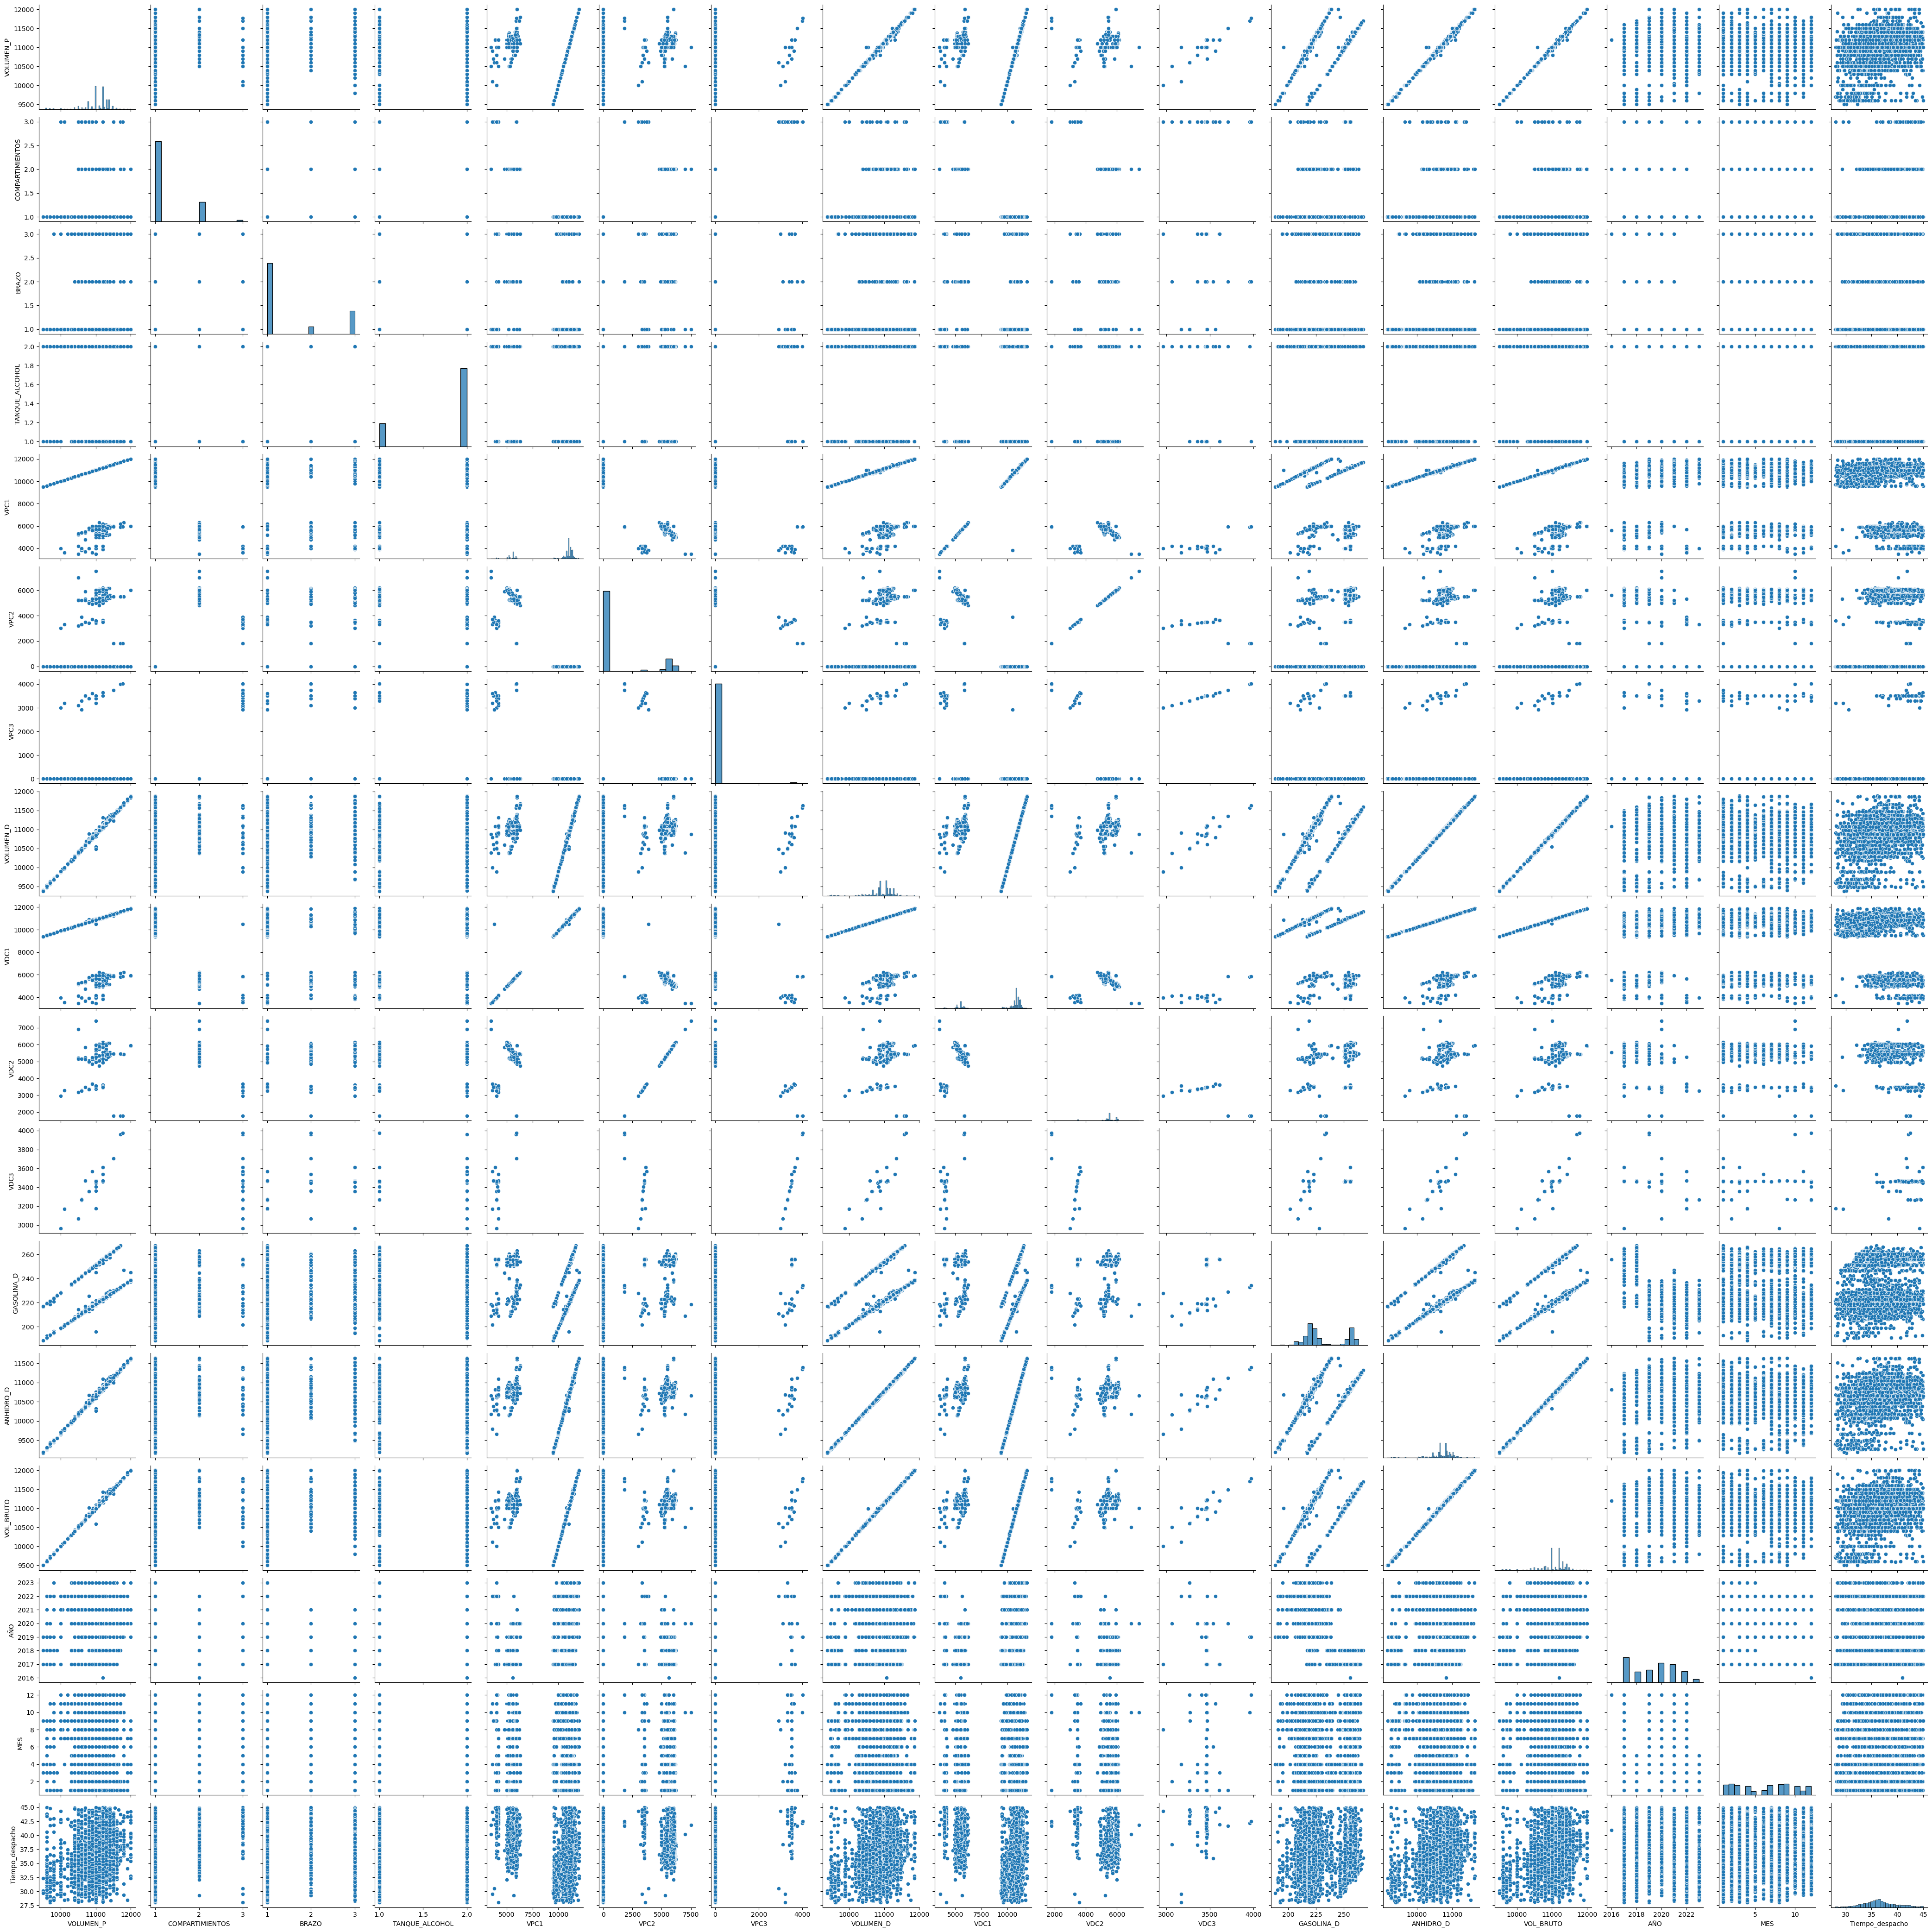

In [720]:
sns.pairplot(df)

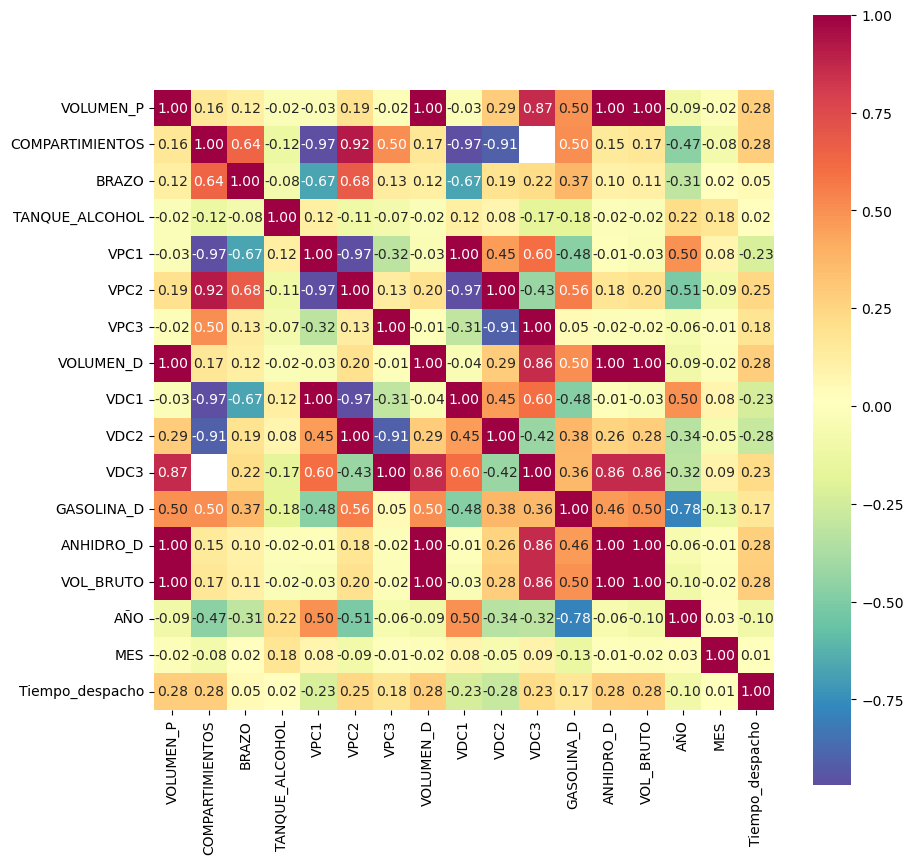

In [725]:

# Correlacion entre variables
corrmat = df.corr(numeric_only=False)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")

hm.set_xticklabels(hm.get_xticklabels(), fontsize=10)
hm.set_yticklabels(hm.get_yticklabels(), fontsize=10)
plt.show()

Como se observa en la anterior gráfica, la correlación entre el tiempo de despacho y el volumen bruto despachado es 0.28 "baja", de igual manera la correlación entre el brazo por el cual se realiza el cargue y el tiempo es casi 0 "baja", y por último, la correlación entre el volumen bruto despachado y el brazo por el cuál se realiza el cargue es de 0.17 "baja" 

Para encontrar alguna relación entre las tres variables de interés, hacemos un gráfico de dispersión 

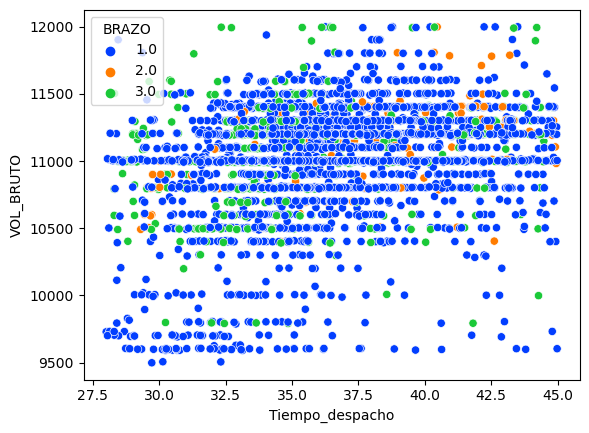

In [726]:
sns.scatterplot(x = 'Tiempo_despacho',
                y = 'VOL_BRUTO', 
                data=df,
                palette='bright',
                hue='BRAZO');

Graficamente, tampoco se observa alguna relación o agrupamiento de los valores de los volumenes con respecto al tiempo ni con respecto al brazo por el cuál se realizó el cargue.

Por último, se graficaran los volumenes despachados con respecto al año por cada brazo de cargue

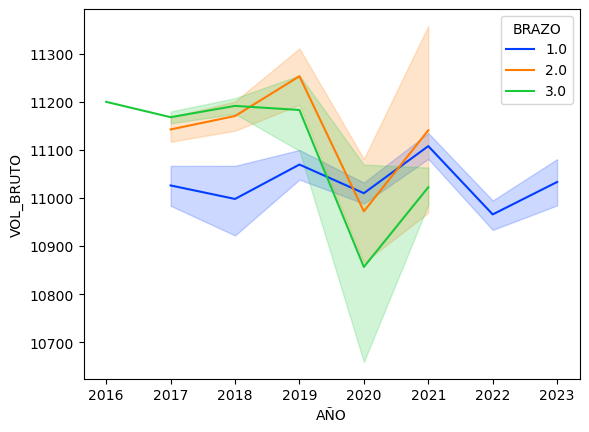

In [729]:
sns.lineplot(x="AÑO", 
             y="VOL_BRUTO",
             data=df,
             palette='bright',
             hue='BRAZO');

Aqui se puede observar algo muy interesante y es que los datos del brazo 2 y 3 existen hasta el 2021, año en que se realizó el cambio del sistema de control, según el cliente, los 3 brazos se han seguido utilizando normalmente, luego, se infiere que hay un problema con el Script que carga la información hacia la base de datos y siempre está informando que se despacha por el brazo 1.

# Conclusiones

### Como conclusión de nuestro  Objetivo de análisis exploratorio,  se puede afirmar que no hay relación directa entre la duración del despacho y el volumen despachado y tampoco entre este tiempo y el brazo por el cual se realizó el cargue del porducto, sin embargo esta ultima relación esta sesgada debido a un posible fallo en el sistema de almacenamiento de la data que carga todos los despachos como si fueran realizados por el brazo número 1, esto se le comunicará al cliente para realizar las respectivas correcciones.